In [22]:
import pandas as pd
from matplotlib import pyplot as plt, colors
import numpy as np
import os
import pickle
import seaborn as sns
from importlib import reload  
import warnings
import functions_paralell_simulations_rbm as ising
ising=reload(ising)

In [2]:
tsel_fam=pd.read_csv('/home/ezequiel/Deposit/ising_rbm/tsel_table_best_ali.csv',index_col=0)
tsel_fam = tsel_fam.drop(11)
tsel_fam.reset_index(inplace=True)
clean_fam = ['DHFR', 'Cytochrome C', 'TIM', 'Trypsin', 'FGF', 'ACBP',
       'Glycolytic', 'Copper-bind', 'Death', 'Trp syntA', 'Serpin',
       'Flavodoxin', 'Ubiquitin', 'RNase H', 'Cytochrome CBB3']
dict_clean_fam = dict(zip(tsel_fam.family.values, clean_fam))
tsel_fam['Family']= tsel_fam['family'].map(dict_clean_fam)


In [3]:
warnings.filterwarnings('ignore')

main_path = '/home/ezequiel/Deposit/ising_rbm/'
i = 0

  #  if tsel_fam.family[i] in families:
print(tsel_fam.family[i])
potts = ising.convert_rbm_potts(tsel_fam.family[i],
                            n_h =  tsel_fam.n_h[i], # RBM number of hidden units
                            n_iter = tsel_fam.n_iter[i], # RBM epochs
                            hidden = 'Gaussian', # RBM potential
                            l1b = 0.25, # RBM regularization
                            main_path = main_path, # rbm path
                            rbm_run_name =  tsel_fam.best_ali[i] ) # rbm folder

breaks = ising.get_breaks(tsel_fam.family[i])
folder = main_path+tsel_fam.family[i]+'/'+tsel_fam.best_ali[i]+'/'

if tsel_fam.family[i]=='DHFR':
    fastapath = '/home/ezequiel/Deposit/foldon_data/DHFR/MSA_nogap_ecoli_version.fasta'        
    uniprot_id = 'P0ABQ4' #e coli
   #uniprot_id='P00378' #human
elif tsel_fam.family[i]=='TIM':
    fastapath = '/home/ezequiel/Deposit/ising_rbm/TIM/rbm_complete_set/MSA_nogap.fasta' 

else:
    fastapath = folder+'MSA_nogap.fasta'
    uniprot_id = tsel_fam.uniprot_id[i]

seq_=ising.extract_sequence_from_fasta(uniprot_id,fastapath)
seq=np.array([np.char.upper(x) for x in seq_])




warnings.filterwarnings('default')

DHFR


In [ ]:
potts = np.load

mkdir: cannot create directory ‘/home/ezequiel/Deposit/ising_rbm/DHFR/rbm_train_set/reference_seq’: File exists


CPU times: user 744 ms, sys: 119 ms, total: 863 ms
Wall time: 11.9 s


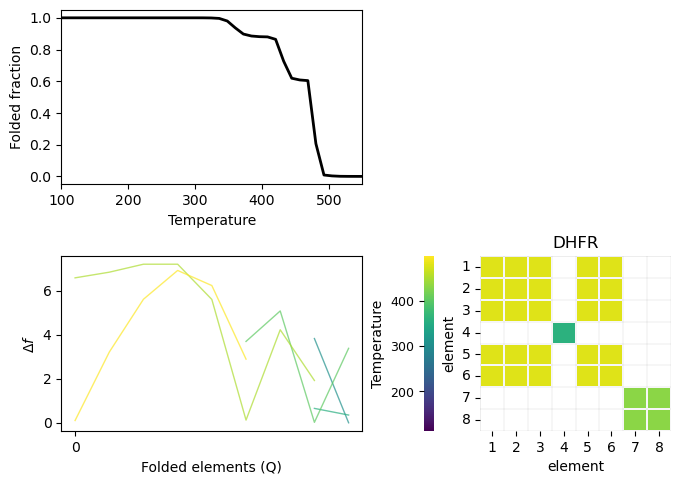

In [24]:
%%time
features = ising.ising_simulation(tsel_fam.family[i],
                           potts,
                           breaks,
                           folder,
                           seq=seq,
                           Tsel = tsel_fam.Tsel[i],
                           si0=0.005, # same as in ank paper
                           k=0.001985875, # [kcal /(mol K)]
                           tini_=100,
                           tfin_=550,
                           DT=10,
                           lim_=5)
                           #cp_factor=5000) # MC  # changed this from 20 for 3,9,10

In [18]:
features

{'tf': 460.0591977789904,
 'width': 19.532923840749856,
 'std_tf': 2.2613332659302015,
 'std_width': 1.972077642236304,
 'coop_score': 0.7142857142857143,
 't_': array([480.03795651, 478.86328147, 478.80088399, 359.47674123,
        478.97692817, 479.02686069, 431.83000081, 431.54179898])}